### 4-1．고객의 특성을 알자
#### 데이터의 리드와 확인

In [1]:
# Pandas의 로드
import pandas as pd

# 파일 리드
d_df = pd.read_csv('b-prep.csv', sep=',')

# 선두에서 5행까지 표시
d_df.head()

,age,job2,number_yoy2,member2,period2,budget,pre_d,Hawaii,Ho Chi Minh,Hong Kong,...,Oceania,South America,fall,spring,summer,winter,bicycle,plane,ship,walking
0,20,0,0,0,0,350000,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,20,0,0,0,0,350000,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,20,0,0,0,0,350000,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,20,0,0,0,0,300000,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,20,0,0,0,0,310000,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [2]:
# 데이터의 건수, 항목수를 확인
print(d_df.shape)

# 데이터 형을 확인
print(d_df.dtypes)

(2736, 70)
age            int64
job2           int64
number_yoy2    int64
member2        int64
period2        int64
               ...  
winter         int64
bicycle        int64
plane          int64
ship           int64
walking        int64
Length: 70, dtype: object


#### データの正規化

In [3]:
# MinMaxScaler의 로드
from sklearn.preprocessing import MinMaxScaler

# 데이터 세트에서 목적변수를 제외
d_df = d_df.drop('pre_d', axis=1)

# 범위변환의 인스턴스를 생성
mc = MinMaxScaler()
mc.fit(d_df)

# d_df의 각항목을 정규화
d_df_mc = pd.DataFrame(mc.transform(d_df), columns=d_df.columns)
d_df_mc.head()

,age,job2,number_yoy2,member2,period2,budget,Hawaii,Ho Chi Minh,Hong Kong,Jeju,...,Oceania,South America,fall,spring,summer,winter,bicycle,plane,ship,walking
0,0.024691,0.0,0.0,0.0,0.0,0.014831,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.024691,0.0,0.0,0.0,0.0,0.014831,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.024691,0.0,0.0,0.0,0.0,0.014831,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.024691,0.0,0.0,0.0,0.0,0.004237,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.024691,0.0,0.0,0.0,0.0,0.006356,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [4]:
# StandardScaler의 로드
from sklearn.preprocessing import StandardScaler

# Z변환 인스턴스 생성
sc = StandardScaler()
sc.fit(d_df)

# d_df의 각항목을 정규화
d_df_sc = pd.DataFrame(sc.transform(d_df), columns=d_df.columns)
d_df_sc.head()

,age,job2,number_yoy2,member2,period2,budget,Hawaii,Ho Chi Minh,Hong Kong,Jeju,...,Oceania,South America,fall,spring,summer,winter,bicycle,plane,ship,walking
0,-0.969151,-1.898963,-0.514126,-0.674773,-0.894427,-0.953220,-0.272406,-0.267732,-0.284597,-0.270854,...,-0.297162,-0.310794,-0.7429,-0.495313,1.495951,-0.400996,-0.642257,-0.894427,3.300856,-0.467663
1,-0.969151,-1.898963,-0.514126,-0.674773,-0.894427,-0.953220,-0.272406,-0.267732,-0.284597,-0.270854,...,-0.297162,-0.310794,-0.7429,-0.495313,1.495951,-0.400996,-0.642257,-0.894427,-0.302952,2.138294
2,-0.969151,-1.898963,-0.514126,-0.674773,-0.894427,-0.953220,-0.272406,-0.267732,-0.284597,-0.270854,...,-0.297162,-0.310794,-0.7429,-0.495313,1.495951,-0.400996,-0.642257,1.118034,-0.302952,-0.467663
3,-0.969151,-1.898963,-0.514126,-0.674773,-0.894427,-0.988214,-0.272406,-0.267732,-0.284597,-0.270854,...,-0.297162,3.217561,-0.7429,-0.495313,1.495951,-0.400996,1.557010,-0.894427,-0.302952,-0.467663
4,-0.969151,-1.898963,-0.514126,-0.674773,-0.894427,-0.981215,-0.272406,-0.267732,-0.284597,-0.270854,...,-0.297162,3.217561,-0.7429,-0.495313,1.495951,-0.400996,-0.642257,-0.894427,3.300856,-0.467663


In [5]:
# 각 항목의 평균과 표준편차를 확인
print(d_df_sc.mean())
print(d_df_sc.std())

age           -1.808170e-16
job2          -2.136368e-15
number_yoy2   -8.122969e-16
member2       -6.006242e-15
period2        2.859636e-15
                   ...     
winter         1.571193e-15
bicycle       -4.988700e-16
plane          1.752984e-17
ship           1.057147e-15
walking       -7.938541e-16
Length: 69, dtype: float64
age            1.000183
job2           1.000183
number_yoy2    1.000183
member2        1.000183
period2        1.000183
                 ...   
winter         1.000183
bicycle        1.000183
plane          1.000183
ship           1.000183
walking        1.000183
Length: 69, dtype: float64


### 4-2．고객의 그룹화
#### 계층적 클러스터링

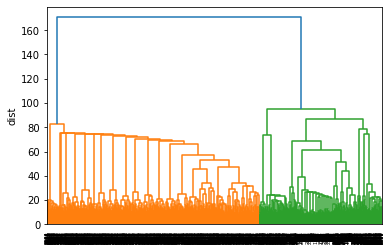

In [13]:
# Linkage, Dendrogram의 로드
from scipy.cluster.hierarchy import linkage, dendrogram
# Matplotlib의 로드
import matplotlib.pyplot as plt
%matplotlib inline

# 계층적 클러스터링의 실행
hcls = linkage(d_df_sc, metric='euclidean', method='ward')
dendrogram(hcls)

# 덴드로그램의 작성
plt.ylabel('dist')
plt.show()

In [7]:
# fcluster의 로드
from scipy.cluster.hierarchy import fcluster

# 고객별로 클러스터ID를 부여
cst_group = fcluster(hcls, 100, criterion='distance')

# 고객별 클러스터 ID를 확인
print(cst_group)

[1 1 1 ... 1 1 1]


#### 비계층적 클러스터링

In [8]:
# KMeans의 로드
from sklearn.cluster import KMeans

# 고객을 10개그룹으로 분할
kcls = KMeans(n_clusters=10)
cst_group = kcls.fit_predict(d_df_sc)

# 고객별 클러스터ID를 확인
print(cst_group)

[5 7 7 ... 9 9 9]


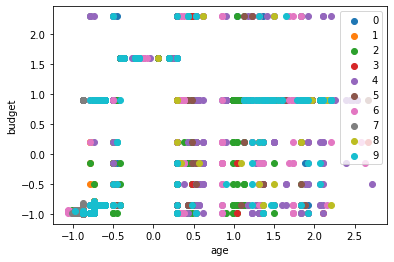

In [9]:
# 고객의 클러스터 ID마다 색을 부여하여 산포도를 작성
for i in range(10):
    tmp = d_df_sc[cst_group == i]
    plt.scatter(tmp['age'], tmp['budget'], label=i)

plt.legend()
plt.xlabel('age')
plt.ylabel('budget')
plt.show()

In [10]:
# 데이터 세트에 클러스터 ID를 추가
d_df_sc['group'] = cst_group

d_df_sc.head()

,age,job2,number_yoy2,member2,period2,budget,Hawaii,Ho Chi Minh,Hong Kong,Jeju,...,South America,fall,spring,summer,winter,bicycle,plane,ship,walking,group
0,-0.969151,-1.898963,-0.514126,-0.674773,-0.894427,-0.953220,-0.272406,-0.267732,-0.284597,-0.270854,...,-0.310794,-0.7429,-0.495313,1.495951,-0.400996,-0.642257,-0.894427,3.300856,-0.467663,5
1,-0.969151,-1.898963,-0.514126,-0.674773,-0.894427,-0.953220,-0.272406,-0.267732,-0.284597,-0.270854,...,-0.310794,-0.7429,-0.495313,1.495951,-0.400996,-0.642257,-0.894427,-0.302952,2.138294,7
2,-0.969151,-1.898963,-0.514126,-0.674773,-0.894427,-0.953220,-0.272406,-0.267732,-0.284597,-0.270854,...,-0.310794,-0.7429,-0.495313,1.495951,-0.400996,-0.642257,1.118034,-0.302952,-0.467663,7
3,-0.969151,-1.898963,-0.514126,-0.674773,-0.894427,-0.988214,-0.272406,-0.267732,-0.284597,-0.270854,...,3.217561,-0.7429,-0.495313,1.495951,-0.400996,1.557010,-0.894427,-0.302952,-0.467663,7
4,-0.969151,-1.898963,-0.514126,-0.674773,-0.894427,-0.981215,-0.272406,-0.267732,-0.284597,-0.270854,...,3.217561,-0.7429,-0.495313,1.495951,-0.400996,-0.642257,-0.894427,3.300856,-0.467663,5


In [11]:
# 그룹별 데이터 건수를 확인
print(d_df_sc['group'].value_counts())

2    609
4    487
1    436
7    362
6    198
9    197
5    186
3    115
0     93
8     53
Name: group, dtype: int64


In [12]:
# 클러스터0의 통계량을 확인
d_df_sc[d_df_sc['group']==0].describe()

,age,job2,number_yoy2,member2,period2,budget,Hawaii,Ho Chi Minh,Hong Kong,Jeju,...,South America,fall,spring,summer,winter,bicycle,plane,ship,walking,group
count,93.000000,9.300000e+01,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.0
mean,0.285290,5.266032e-01,0.067615,0.067335,0.252459,0.343721,-0.145199,-0.052527,0.082983,-0.015185,...,0.106538,0.110660,0.045384,-0.086637,-0.089728,0.067184,-0.072131,-0.186700,0.148800,0.0
std,0.990176,6.697443e-16,1.050738,1.030160,1.001752,1.033782,0.700515,0.907729,1.129064,0.978837,...,1.145619,1.032455,1.038599,0.964786,0.901613,1.033650,0.994639,0.640189,1.113454,0.0
min,-0.782415,5.266032e-01,-0.514126,-0.674773,-0.894427,-0.995213,-0.272406,-0.267732,-0.284597,-0.270854,...,-0.310794,-0.742900,-0.495313,-0.668471,-0.400996,-0.642257,-0.894427,-0.302952,-0.467663,0.0
25%,-0.642364,5.266032e-01,-0.514126,-0.674773,-0.894427,-0.848237,-0.272406,-0.267732,-0.284597,-0.270854,...,-0.310794,-0.742900,-0.495313,-0.668471,-0.400996,-0.642257,-0.894427,-0.302952,-0.467663,0.0
50%,-0.175525,5.266032e-01,-0.514126,-0.674773,1.118034,0.901417,-0.272406,-0.267732,-0.284597,-0.270854,...,-0.310794,-0.742900,-0.495313,-0.668471,-0.400996,-0.642257,-0.894427,-0.302952,-0.467663,0.0
75%,1.318358,5.266032e-01,-0.514126,1.481979,1.118034,0.901449,-0.272406,-0.267732,-0.284597,-0.270854,...,-0.310794,1.346076,-0.495313,1.495951,-0.400996,1.557010,1.118034,-0.302952,-0.467663,0.0
max,1.971932,5.266032e-01,1.945049,1.481979,1.118034,2.301238,3.670993,3.735080,3.513736,3.692021,...,3.217561,1.346076,2.018927,1.495951,2.493792,1.557010,1.118034,3.300856,2.138294,0.0
